<a href="https://colab.research.google.com/github/Raagulbharatwaj/Understanding-Deep-Learning/blob/main/Mastering_Deep_Learning_The_Art_of_Approximating_Non_Linearities_with_Piecewise_Estimations_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Layer

In [2]:
x = np.linspace(-1*np.pi,np.pi,100000)
y = np.sin(2*x) + np.cos(x) + x

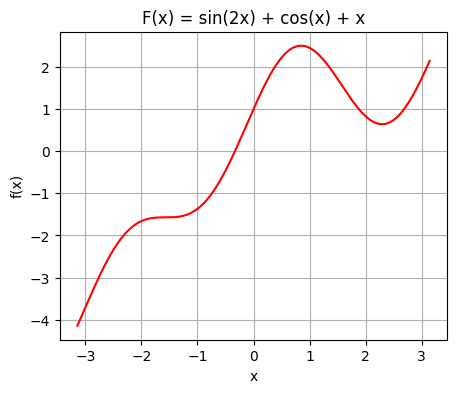

In [3]:
plt.figure(figsize=(5, 4))
plt.plot(x,y,color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('F(x) = sin(2x) + cos(x) + x')
plt.grid(True)
plt.show()

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(2,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 45 (180.00 Byte)
Trainable params: 45 (180.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',loss='mse')

In [7]:
model.fit(x,y,epochs=5)

Epoch 1/5
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4196
Epoch 2/5
3125/3125 [==============================] - 10s 3ms/step - loss: 0.2419
Epoch 3/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.2417
Epoch 4/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.2418
Epoch 5/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.2417


In [8]:
from mpl_toolkits.mplot3d import Axes3D
def visualize_indemediate_estimations(model, x_values, y_true):
  h1 = np.linspace(-2*np.pi,2*np.pi,100)
  h2 = np.linspace(-2*np.pi,2*np.pi,100)
  h1_grid, h2_grid = np.meshgrid(h1, h2)
  new_model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(2,)),
      model.layers[1]
  ])
  input_data = np.column_stack((h1_grid.ravel(), h2_grid.ravel()))
  y_prime = new_model.predict(input_data)
  y_prime = y_prime.reshape(100,100,10)
  fig = plt.figure(figsize=(20, 6))
  for i in range(10):
      ax = fig.add_subplot(2,5, i + 1, projection='3d')
      ax.plot_surface(h1_grid, h2_grid, y_prime[:, :, i], cmap='coolwarm')
      ax.set_title(f'Neuron {i + 1}')
      ax.set_xticks([])
      ax.set_yticks([])
      ax.set_zticks([])
  plt.show()

313/313 [==============================] - 0s 1ms/step


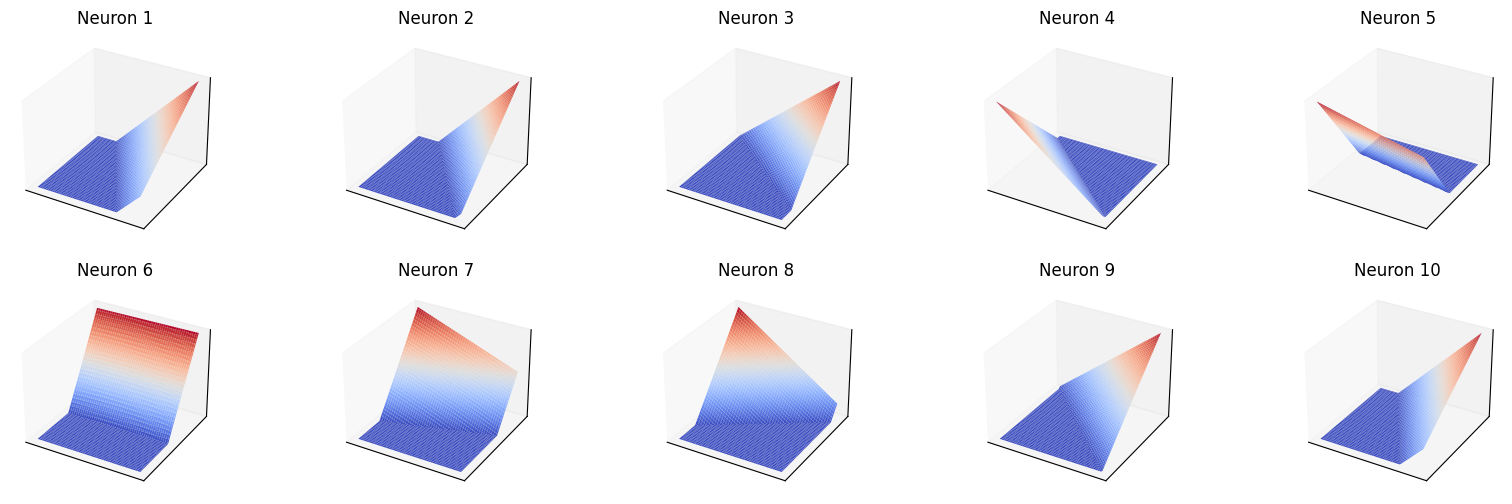

In [9]:
visualize_indemediate_estimations(model,x,y)

In [10]:
def f(x1, x2):
    return np.sin(2*x1)*np.sin(2*x2) + np.cos(x1)*np.cos(x2) + x1 + x2

In [11]:
x1 = np.linspace(-1 * np.pi, np.pi, 1000)
x2 = np.linspace(-1 * np.pi, np.pi, 100)
x1, x2 = np.meshgrid(x1, x2)
y = f(x1, x2)

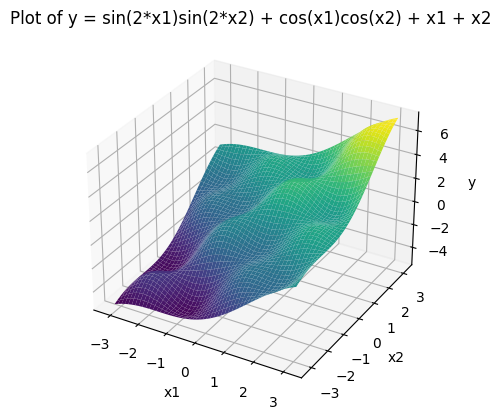

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Plot of y = sin(2*x1)sin(2*x2) + cos(x1)cos(x2) + x1 + x2')
plt.show()

In [13]:
def visualize_original_and_predicted_planes(model):
    x1 = np.linspace(-1 * np.pi, np.pi, 1000)
    x2 = np.linspace(-1 * np.pi, np.pi, 100)
    x1, x2 = np.meshgrid(x1, x2)
    y = f(x1, x2)
    input  = np.column_stack((x1.flatten(), x2.flatten()))
    y_pred = model.predict(input)
    y_pred = y_pred.reshape(x1.shape)
    fig = plt.figure(figsize=(20, 6))
    ax = fig.add_subplot(1, 2, 1,projection='3d')
    surf1 = ax.plot_surface(x1, x2, y, cmap='viridis')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title('Original Plane')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax = fig.add_subplot(1, 2, 2,projection='3d')
    surf2 = ax.plot_surface(x1, x2, y_pred, cmap='plasma')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title('Predicted Plane')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    plt.subplots_adjust(hspace=0.3)
    plt.show()

In [14]:
X = np.column_stack((x1.flatten(), x2.flatten()))
y = y.flatten()

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

In [16]:
model.compile(optimizer='adam', loss='mse')

In [17]:
model.fit(X,y,epochs=5)

Epoch 1/5
3125/3125 [==============================] - 5s 2ms/step - loss: 2.9267
Epoch 2/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.9757
Epoch 3/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6270
Epoch 4/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.5321
Epoch 5/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.5120


3125/3125 [==============================] - 4s 1ms/step


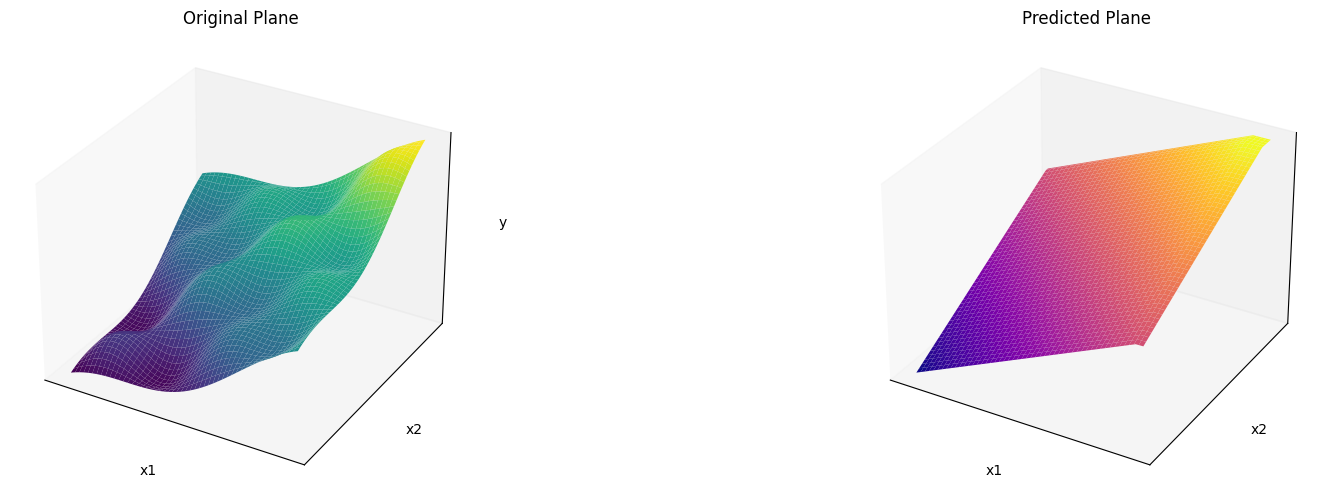

In [18]:
visualize_original_and_predicted_planes(model)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

In [20]:
model.compile(optimizer='adam', loss='mse')

In [21]:
model.fit(X,y,epochs=5)

Epoch 1/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6559
Epoch 2/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.2144
Epoch 3/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1835
Epoch 4/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1718
Epoch 5/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.1646


3125/3125 [==============================] - 4s 1ms/step


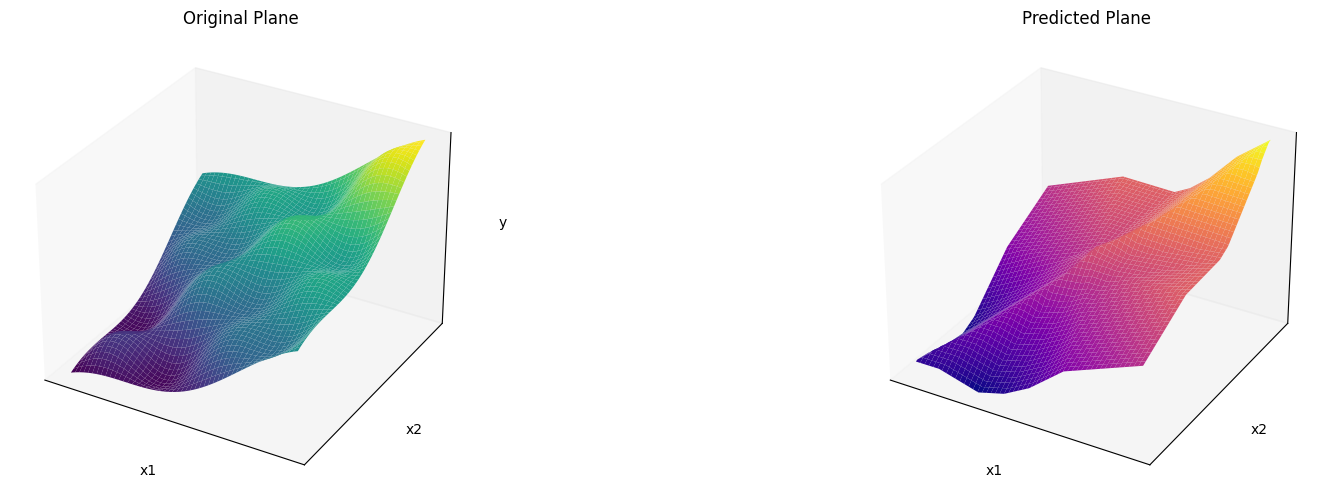

In [22]:
visualize_original_and_predicted_planes(model)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

In [24]:
model.compile(optimizer='adam', loss='mse')

In [25]:
model.fit(X,y,epochs=5)

Epoch 1/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.5264
Epoch 2/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1718
Epoch 3/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1218
Epoch 4/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0994
Epoch 5/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0705


3125/3125 [==============================] - 4s 1ms/step


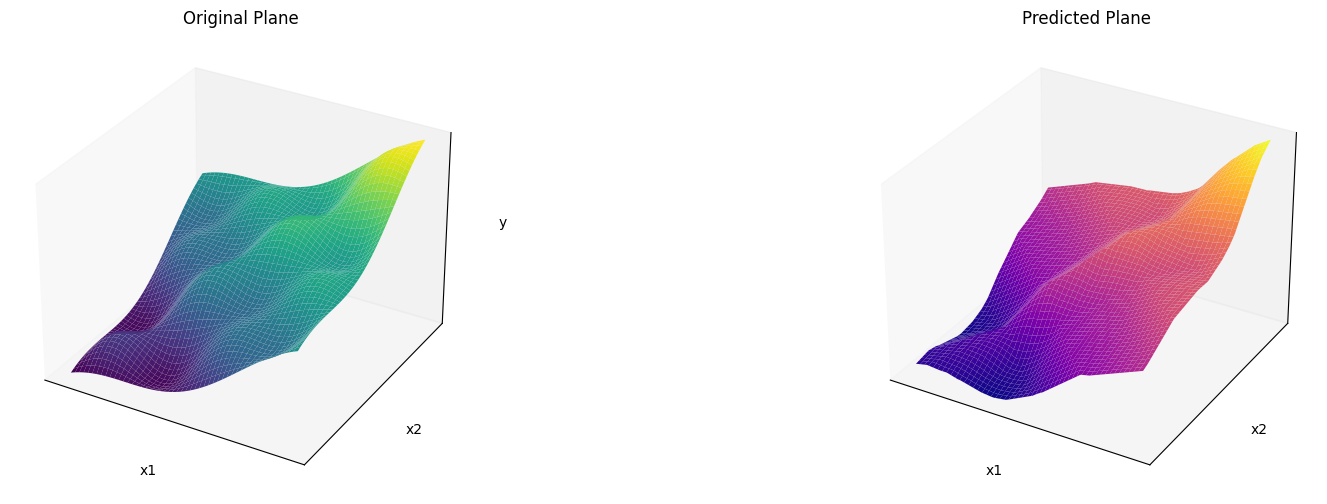

In [26]:
visualize_original_and_predicted_planes(model)

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

In [28]:
model.compile(optimizer='adam', loss='mse')

In [29]:
model.fit(X,y,epochs=5)

Epoch 1/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.4155
Epoch 2/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1540
Epoch 3/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0973
Epoch 4/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0610
Epoch 5/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0487


3125/3125 [==============================] - 5s 2ms/step


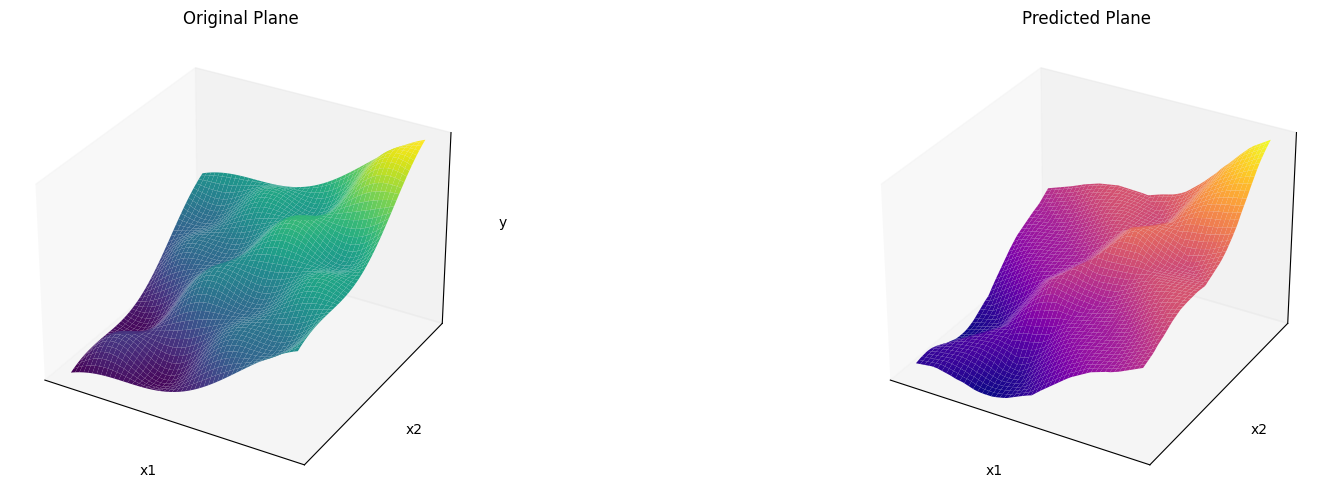

In [30]:
visualize_original_and_predicted_planes(model)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [32]:
model.compile(optimizer='adam', loss='mse')

In [33]:
model.fit(X,y,epochs=5)

Epoch 1/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.9816
Epoch 2/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.1865
Epoch 3/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1393
Epoch 4/5
3125/3125 [==============================] - 6s 2ms/step - loss: 0.1121
Epoch 5/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1046


3125/3125 [==============================] - 4s 1ms/step


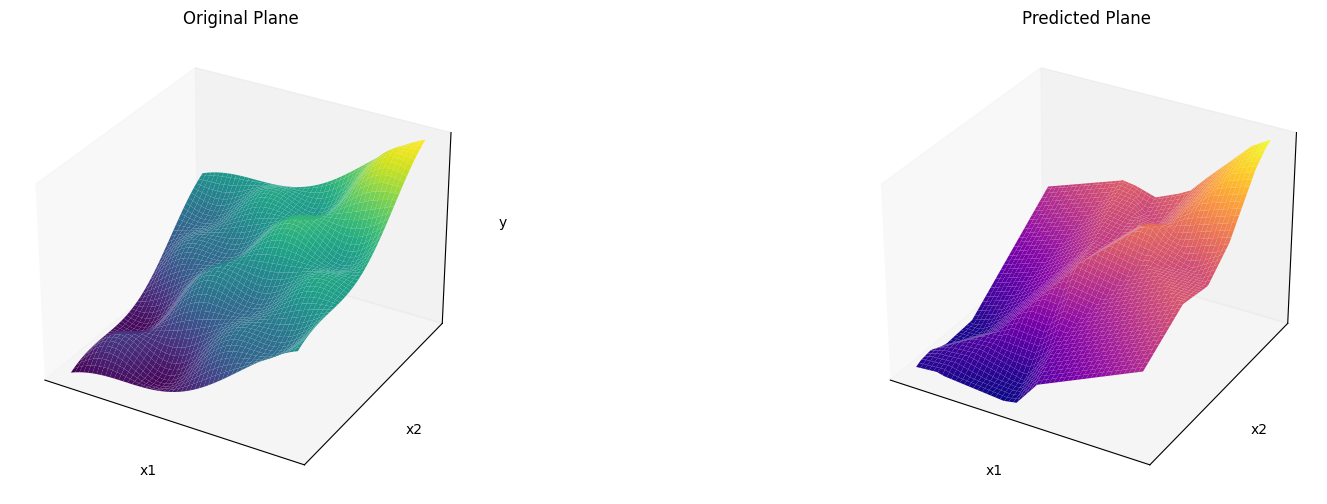

In [34]:
visualize_original_and_predicted_planes(model)

In [35]:
x  = np.linspace(-np.pi,np.pi,100000)
y1 = np.sin(x)
y2 = np.cos(x)

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3,activation='relu',input_shape=(1,)),
    tf.keras.layers.Dense(2)
])

In [37]:
model.compile(loss='mse',optimizer='adam')

In [38]:
model.fit(x, np.column_stack([y1, y2]), epochs=5)

Epoch 1/5
3125/3125 [==============================] - 5s 1ms/step - loss: 0.0986
Epoch 2/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0168
Epoch 3/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0121
Epoch 4/5
3125/3125 [==============================] - 5s 1ms/step - loss: 0.0116
Epoch 5/5
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0115


In [39]:
def visualize_predictions(model,x,y1_true,y2_true):
  y_pred  = model.predict(x)
  y1_pred = y_pred[:,0]
  y2_pred = y_pred[:,1]
  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  plt.plot(x, y1_true, label='y1 = sin(x)', color='blue')
  plt.plot(x, y1_pred, label='Predicted y1', color='red')
  plt.xlabel('x')
  plt.ylabel('y1')
  plt.title('Function-1 as Estimated by the model')
  plt.legend()
  plt.grid(True,"major")
  plt.grid(True,"minor",linestyle=':', linewidth=0.5)

  plt.subplot(1, 2, 2)
  plt.plot(x, y2_true, label='y2 = cos(x)', color='blue')
  plt.plot(x, y2_pred, label='Predicted y2', color='red')
  plt.xlabel('x')
  plt.ylabel('y2')
  plt.title('Function-2 as Estimated by the model')
  plt.legend()
  plt.grid(True,"major")
  plt.grid(True,"minor",linestyle=':', linewidth=0.5)

  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(12,5))
  plt.plot(x, y1_pred, label='Predicted y1', color='blue')
  plt.plot(x, y2_pred, label='Predicted y2', color='red')
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title('Functions f1 and f2 as Estimated by the model')
  plt.grid(True,"major")
  plt.grid(True,"minor",linestyle=':', linewidth=0.5)
  plt.minorticks_on()
  plt.legend()

3125/3125 [==============================] - 4s 1ms/step


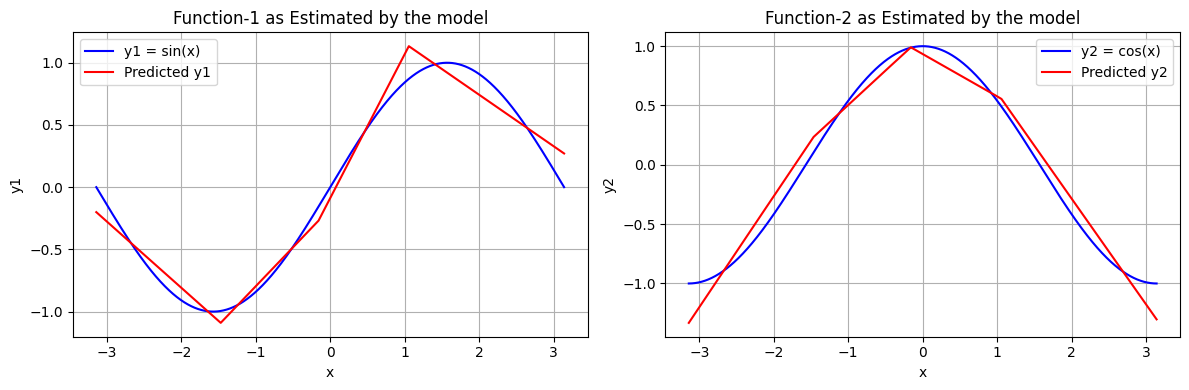

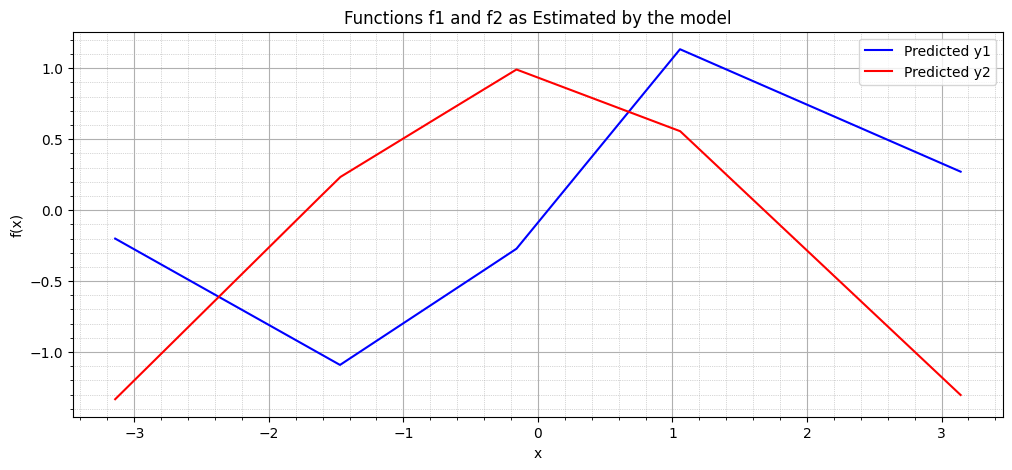

In [40]:
visualize_predictions(model,x,y1,y2)